* Dan Shea
* 2017.04.03
* SNP-Analysis - Generate statistical data and plots based on variant calling data of unique R09 and S11 sequence information mapped to the _B. rapa_ var. Chiifu reference genome

In [1]:
# We want pandas to load in data frames
import pandas as pd

In [2]:
# We want gzip library because we store the large files in gzip compressed format
import gzip

In [3]:
# We need matplotlib for plotting the data
from matplotlib import pyplot as plt

In [4]:
# Numpy for some additional utility while plotting
import numpy as np

In [5]:
# Inline plots for now
%matplotlib inline

In [6]:
# Read in all the data files, store them as DataFrames
R09File  = 'R09-homozygous-variants.snpeff.unique.tsv.gz'
S11File  = 'S11-homozygous-variants.snpeff.unique.tsv.gz'
R09FH    = gzip.open(R09File, 'rt')
S11FH    = gzip.open(S11File, 'rt')
R09      = pd.read_table(R09FH)
S11      = pd.read_table(S11FH)

In [7]:
# Check R09 looks OK
R09

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,R09
0,A01,1565,.,T,A,79.26360,.,DP=6;VDB=0.0643982;SGB=-0.590765;MQSB=1;MQ0F=0...,GT:PL,"1/1:112,15,0"
1,A01,1601,.,G,A,28.77010,.,DP=2;VDB=0.02;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:60,6,0"
2,A01,4554,.,T,G,21.79310,.,DP=3;VDB=0.6;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2;...,GT:PL,"1/1:53,6,0"
3,A01,4555,.,G,C,21.79310,.,DP=3;VDB=0.64;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:53,6,0"
4,A01,4582,.,T,C,21.79310,.,DP=2;VDB=0.38;SGB=-0.453602;MQ0F=0;AF1=1;AC1=2...,GT:PL,"1/1:53,6,0"
5,A01,4657,.,C,T,88.06580,.,DP=7;VDB=0.291224;SGB=-0.636426;MQ0F=0;AF1=1;A...,GT:PL,"1/1:121,21,0"
6,A01,4736,.,A,T,185.00000,.,DP=16;VDB=0.0288079;SGB=-0.683931;MQSB=1;MQ0F=...,GT:PL,"1/1:218,39,0"
7,A01,4969,.,A,G,76.13270,.,DP=6;VDB=0.186688;SGB=-0.616816;MQ0F=0;AF1=1;A...,GT:PL,"1/1:109,18,0"
8,A01,4996,.,A,G,65.26340,.,DP=5;VDB=0.431509;SGB=-0.590765;MQ0F=0;AF1=1;A...,GT:PL,"1/1:98,15,0"
9,A01,5178,.,TAA,T,14.38450,.,INDEL;IDV=3;IMF=1;DP=3;VDB=0.1;SGB=-0.453602;M...,GT:PL,"1/1:53,6,0"


In [8]:
# Check S11 looks OK
S11

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,S11
0,A01,1379,.,T,C,77.26350,.,DP=5;VDB=0.956997;SGB=-0.590765;MQSB=0.833333;...,GT:PL,"1/1:110,15,0"
1,A01,1404,.,C,T,31.97470,.,DP=3;VDB=0.275636;SGB=-0.511536;MQSB=1;MQ0F=0;...,GT:PL,"1/1:64,9,0"
2,A01,5070,.,G,A,67.51320,.,DP=4;VDB=0.579441;SGB=-0.556411;MQSB=1;MQ0F=0;...,GT:PL,"1/1:100,12,0"
3,A01,7263,.,C,A,180.00100,.,DP=13;VDB=0.415179;SGB=-0.680642;MQSB=1;MQ0F=0...,GT:PL,"1/1:213,36,0"
4,A01,7264,.,C,T,152.00700,.,DP=13;VDB=0.18634;SGB=-0.670168;MQSB=1;MQ0F=0;...,GT:PL,"1/1:185,30,0"
5,A01,7265,.,C,T,159.00300,.,DP=13;VDB=0.48517;SGB=-0.676189;MQSB=1;MQ0F=0;...,GT:PL,"1/1:192,33,0"
6,A01,7597,.,G,T,39.97250,.,DP=4;VDB=0.0349627;SGB=-0.511536;MQ0F=0;AF1=1;...,GT:PL,"1/1:72,9,0"
7,A01,7819,.,CGGAG,CGGAGAGGAGAAGGAG,14.38450,.,INDEL;IDV=2;IMF=0.666667;DP=3;VDB=0.28;SGB=-0....,GT:PL,"1/1:53,6,0"
8,A01,9143,.,CAAGT,CAAGTAAGT,47.97210,.,INDEL;IDV=4;IMF=1;DP=4;VDB=0.0395055;SGB=-0.55...,GT:PL,"1/1:88,12,0"
9,A01,9465,.,TTTTCCTTTCCTT,TTTTCCTTTCCTTTCCTT,92.97260,.,INDEL;IDV=5;IMF=0.833333;DP=6;VDB=0.0587288;SG...,GT:PL,"1/1:133,12,0"


In [9]:
R09_INDELS = R09[R09.INFO.str.startswith('INDEL')]

In [10]:
S11_INDELS = S11[S11.INFO.str.startswith('INDEL')]

In [11]:
Chromosomes = ['A01','A02','A03','A04','A05','A06','A07','A08','A09','A10',]

In [12]:
R09_Chromosomes = {key: 0 for key in Chromosomes}
S11_Chromosomes = {key: 0 for key in Chromosomes}

In [13]:
for chromosome in R09_Chromosomes:
    R09_Chromosomes[chromosome] = sum(R09.CHROM == chromosome)
    S11_Chromosomes[chromosome] = sum(S11.CHROM == chromosome)

In [14]:
R09_Chromosomes

{'A01': 61733,
 'A02': 33051,
 'A03': 63572,
 'A04': 37935,
 'A05': 43461,
 'A06': 74827,
 'A07': 64308,
 'A08': 88878,
 'A09': 67670,
 'A10': 25744}

In [15]:
S11_Chromosomes

{'A01': 46060,
 'A02': 61953,
 'A03': 66190,
 'A04': 60028,
 'A05': 62416,
 'A06': 60018,
 'A07': 51005,
 'A08': 47238,
 'A09': 88354,
 'A10': 28287}

In [16]:
R09_Chromosomes_pct = R09_Chromosomes.copy()
S11_Chromosomes_pct = S11_Chromosomes.copy()
for chromosome in R09_Chromosomes:
    R09_Chromosomes_pct[chromosome] = R09_Chromosomes[chromosome] / R09.shape[0]
    S11_Chromosomes_pct[chromosome] = S11_Chromosomes[chromosome] / S11.shape[0]

In [17]:
R09_Chromosomes_pct

{'A01': 0.11000589829626554,
 'A02': 0.058895646487127994,
 'A03': 0.11328292755074584,
 'A04': 0.067598751913382354,
 'A05': 0.077445877340385147,
 'A06': 0.13333891681620302,
 'A07': 0.11459445203758516,
 'A08': 0.15837727356155523,
 'A09': 0.12058541035926149,
 'A10': 0.045874845637488219}

In [18]:
S11_Chromosomes_pct

{'A01': 0.080588016075612071,
 'A02': 0.10839490577360822,
 'A03': 0.11580809344430661,
 'A04': 0.10502686558807731,
 'A05': 0.10920498504940084,
 'A06': 0.1050093692754252,
 'A07': 0.089239942682079756,
 'A08': 0.082649081706030456,
 'A09': 0.15458692080644004,
 'A10': 0.049491819599019507}

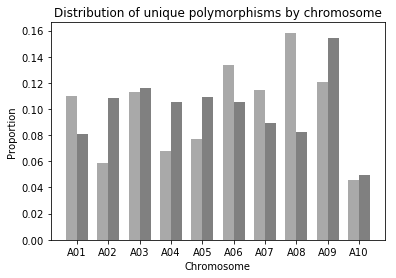

In [19]:
# Make a side-by-side bar plot showing the distribution of polymorphisms found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_Chromosomes_pct)) # the x locations for the groups
width = 0.35                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_Chromosomes_pct.values(), width, color='darkgray')
S11_rects = ax.bar(ind+width, S11_Chromosomes_pct.values(), width, color='gray')
ax.set_title('Distribution of unique polymorphisms by chromosome')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(R09_Chromosomes_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('Unique_Polymorphisms_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
R09_SNPs = R09[R09.INFO.str.startswith('DP=')]
S11_SNPs = S11[S11.INFO.str.startswith('DP=')]

In [21]:
# 2017.04.08 - Fujimoto-sensei requested only SNPs by chromosome
# So, I have added code here to calculate and plot that data
R09_SNP_per_chromosome_counts = {'A01': 0, 'A02': 0, 'A03': 0, 'A04': 0, 'A05': 0,
                             'A06': 0, 'A07': 0, 'A08': 0, 'A09': 0, 'A10': 0,}
S11_SNP_per_chromosome_counts = {'A01': 0, 'A02': 0, 'A03': 0, 'A04': 0, 'A05': 0,
                             'A06': 0, 'A07': 0, 'A08': 0, 'A09': 0, 'A10': 0,}
for k in R09_SNP_per_chromosome_counts:
    R09_SNP_per_chromosome_counts[k] = sum(R09_SNPs.CHROM == k)
    S11_SNP_per_chromosome_counts[k] = sum(S11_SNPs.CHROM == k)

In [22]:
R09_SNP_per_chromosome_counts

{'A01': 53332,
 'A02': 28560,
 'A03': 54773,
 'A04': 32316,
 'A05': 37451,
 'A06': 64621,
 'A07': 55871,
 'A08': 77327,
 'A09': 58420,
 'A10': 22165}

In [23]:
S11_SNP_per_chromosome_counts

{'A01': 39631,
 'A02': 53818,
 'A03': 57222,
 'A04': 52320,
 'A05': 54664,
 'A06': 51615,
 'A07': 44127,
 'A08': 41208,
 'A09': 77494,
 'A10': 24485}

In [24]:
R09_SNP_per_chromosome_pct = R09_SNP_per_chromosome_counts.copy()
S11_SNP_per_chromosome_pct = S11_SNP_per_chromosome_counts.copy()
# They have the exact same keys, so we can do them both in a single loop
for key in R09_SNP_per_chromosome_pct:
    R09_SNP_per_chromosome_pct[key] = R09_SNP_per_chromosome_pct[key] / R09_SNPs.shape[0]
    S11_SNP_per_chromosome_pct[key] = S11_SNP_per_chromosome_pct[key] / S11_SNPs.shape[0]

In [25]:
R09_SNP_per_chromosome_pct

{'A01': 0.11000008250212442,
 'A02': 0.058906516842808704,
 'A03': 0.11297222153470451,
 'A04': 0.066653466326757921,
 'A05': 0.077244676550421179,
 'A06': 0.13328424456929766,
 'A07': 0.1152369048502999,
 'A08': 0.15949104439439316,
 'A09': 0.12049435272958278,
 'A10': 0.045716489699609765}

In [26]:
S11_SNP_per_chromosome_pct

{'A01': 0.07980724308475505,
 'A02': 0.10837642775441818,
 'A03': 0.11523125996810207,
 'A04': 0.10535981827847857,
 'A05': 0.11008006701786606,
 'A06': 0.103940118892272,
 'A07': 0.088861099028563137,
 'A08': 0.082982939442269588,
 'A09': 0.15605416203502329,
 'A10': 0.049306864498252057}

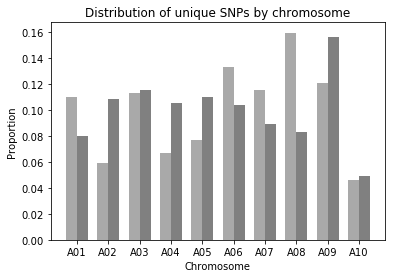

In [27]:
# Make a side-by-side bar plot showing the distribution of SNPs found on each chromosome
# for the R09 and S11 genome mappings.
ind = np.arange(len(R09_SNP_per_chromosome_pct)) # the x locations for the groups
width = 0.35                                    # the width of the bars
fig, ax = plt.subplots()
R09_rects = ax.bar(ind, R09_SNP_per_chromosome_pct.values(), width, color='darkgray')
S11_rects = ax.bar(ind+width, S11_SNP_per_chromosome_pct.values(), width, color='gray')
ax.set_title('Distribution of unique SNPs by chromosome')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(R09_SNP_per_chromosome_pct), rotation=0)
ax.set_xlabel('Chromosome')
ax.set_ylabel('Proportion')

#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(int(height)),
#                ha='left', va='bottom', rotation=45)

#autolabel(R09_rects)
#autolabel(S11_rects)

plt.savefig('Unique_SNPs_by_chromosome.png', dpi=300, bbox_inches='tight')
plt.show()

In [28]:
# For Indel length distributions we can use previously created R09_INDELS and S11_INDELS
R09_INDEL_sizes = dict()
for ref, alt_list in zip(R09_INDELS.REF.apply(len), R09_INDELS.ALT.apply(str.split, args=(','))):
    for alt in alt_list:
        delta = ref - len(alt)
        if delta in R09_INDEL_sizes:
            R09_INDEL_sizes[delta] += 1
        else:
            R09_INDEL_sizes[delta] = 1

S11_INDEL_sizes = dict()
for ref, alt_list in zip(S11_INDELS.REF.apply(len), S11_INDELS.ALT.apply(str.split, args=(','))):
    for alt in alt_list:
        delta = ref - len(alt)
        if delta in S11_INDEL_sizes:
            S11_INDEL_sizes[delta] += 1
        else:
            S11_INDEL_sizes[delta] = 1


In [29]:
# Convert to percentages to plot distribution
R09_INDEL_sizes_pct = {key: R09_INDEL_sizes[key]/sum(R09_INDEL_sizes.values()) for key in R09_INDEL_sizes}
S11_INDEL_sizes_pct = {key: S11_INDEL_sizes[key]/sum(S11_INDEL_sizes.values()) for key in S11_INDEL_sizes}

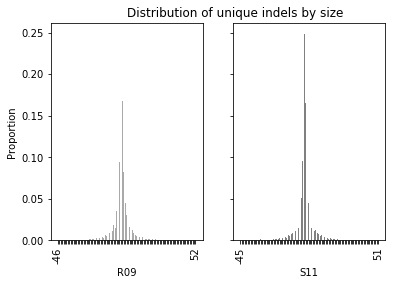

In [30]:
# Plot the calculated size distributions of indels for each genome using
ind1 = np.arange(len(R09_INDEL_sizes_pct)) # the x locations for R09
ind2 = np.arange(len(S11_INDEL_sizes_pct)) # the x locations for S11
width = 0.5                                # the width of the bars
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # Two plots side by side sharing the y-axis

R09_rects = ax1.bar(ind1, [R09_INDEL_sizes_pct[k] for k in sorted(R09_INDEL_sizes_pct.keys())], width, color='darkgray')
ax1.set_xticks(ind1)
R09_ticks = sorted(R09_INDEL_sizes_pct.keys())
ax1.set_xticklabels([min(R09_ticks)]+['' for i in range(len(ind1)-2)]+[max(R09_ticks)], ha='center', rotation=90)

S11_rects = ax2.bar(ind2, [S11_INDEL_sizes_pct[k] for k in sorted(S11_INDEL_sizes_pct.keys())], width, color='gray')
ax2.set_xticks(ind2)
S11_ticks = sorted(S11_INDEL_sizes_pct.keys())
ax2.set_xticklabels([min(S11_ticks)]+['' for i in range(len(ind2)-2)]+[max(S11_ticks)], ha='center', rotation=90)

ax1.set_title('Distribution of unique indels by size', ha='left')
ax1.set_xlabel('R09')
ax2.set_xlabel('S11')
ax1.set_ylabel('Proportion')

#ax.set_yticks(np.arange(0,1.1,0.2))
#def autolabel(rects):
#    """
#    Attach a text label above each bar displaying its height
#    """
#    for rect in rects:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height,
#                '{}'.format(height),
#                ha='left', va='bottom', rotation=45)
#
#autolabel(R09_rects)
#autolabel(S11_rects)
plt.savefig('Unique_Indels_by_size.png', dpi=300, bbox_inches='tight')
plt.show()